In [1]:
import os
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
%matplotlib inline

from mpl_settings_v3 import *
from planar import create_points, create_dt_edgelist, replicate

fig_dir = '../draft/figs'

In [2]:
N = 6
points = np.array(
    [[0.1, 0.12],
    [0.72, 0.31],
    [0.45, 0.57],
    [0.86, 0.7]]
)
points = create_points(N, random_seed=40)

tri = sp.spatial.Delaunay(points)
rep_points = replicate(points)
rep_tri = sp.spatial.Delaunay(rep_points)

filtered_rep_simplices = []
for t in rep_tri.simplices:
    if set(t).intersection(set(range(N))):
        filtered_rep_simplices.append(t)
#rep_tri.simplices
filtered_rep_simplices = np.array(filtered_rep_simplices)
mask = np.unique(filtered_rep_simplices)
filtered_rep_points = rep_points[mask]

relabeled_simplices = []
for simplex in filtered_rep_simplices:
    relabeled_simplices.append([simplex[i]%N for i in range(3)])
relabeled_simplices = np.unique(np.sort(relabeled_simplices, axis=1), axis=0)
#assert relabeled_simplices.shape[0] == 2*N
print(relabeled_simplices.shape[0])

10


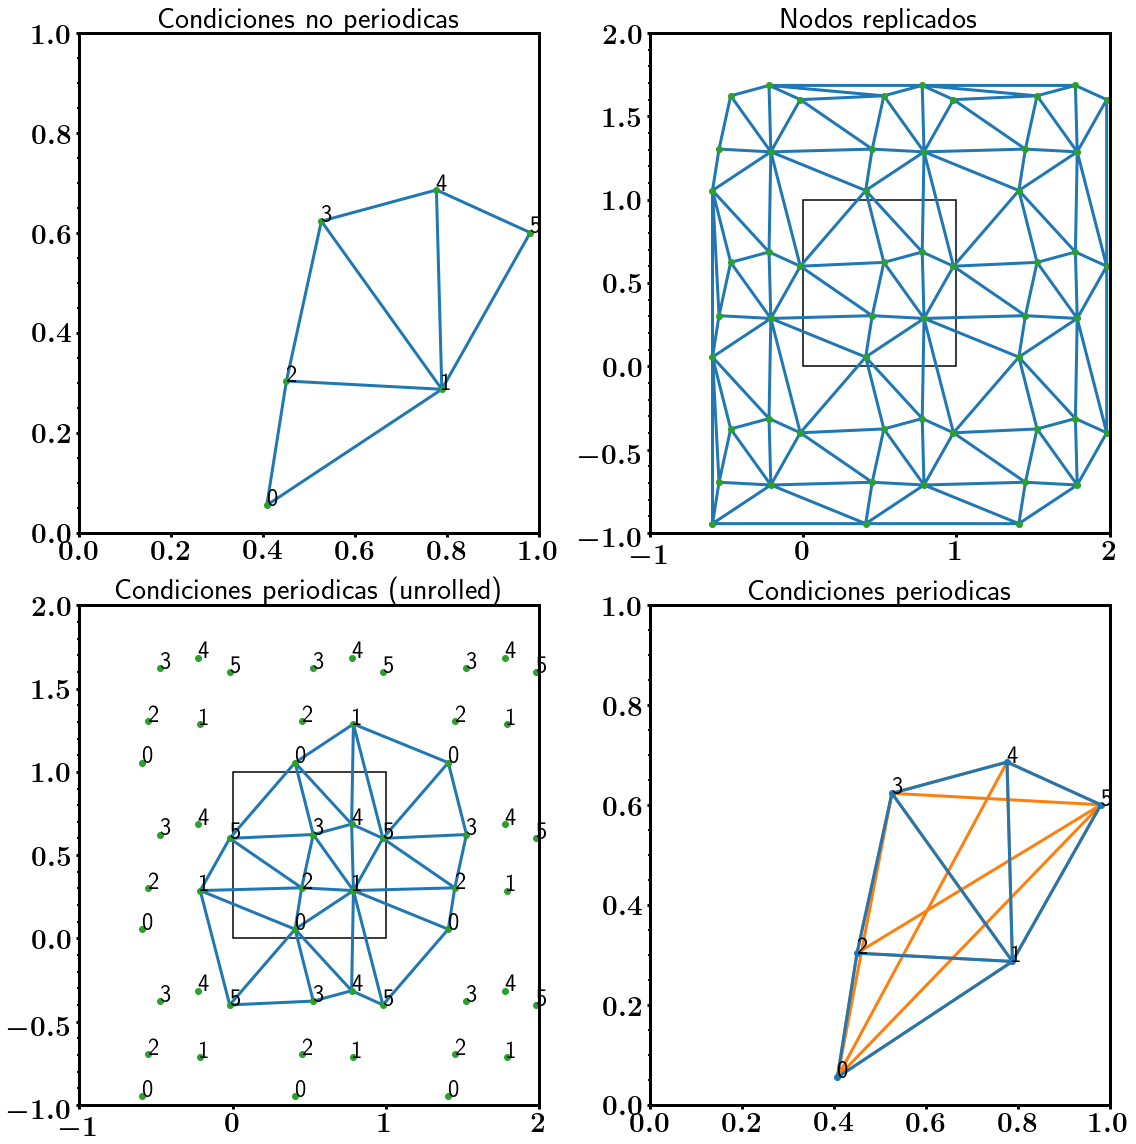

In [3]:
ncols = 2
nrows = 2
fig, axes = plt.subplots(figsize=(8*ncols,8*nrows), ncols=ncols, nrows=nrows)

ax = axes[0,0]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Condiciones no periodicas', fontsize=30)
ax.triplot(points[:,0], points[:,1], tri.simplices)
ax.plot(points[:,0], points[:,1], 'o')
for i, (x, y) in enumerate(points):
    ax.text(x, y, i, fontsize=24)

    
ax = axes[0,1]
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_title('Nodos replicados', fontsize=30)
ax.triplot(rep_points[:,0], rep_points[:,1], rep_tri.simplices)
ax.plot(rep_points[:,0], rep_points[:,1], 'o')
patch = patches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='k')
ax.add_patch(patch)


ax = axes[1, 0]
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_title('Condiciones periodicas (unrolled)', fontsize=30)
ax.triplot(rep_points[:,0], rep_points[:,1], filtered_rep_simplices)
ax.plot(rep_points[:,0], rep_points[:,1], 'o')
for i, (x, y) in enumerate(rep_points):
    ax.text(x, y, i%N, fontsize=24)
patch = patches.Rectangle((0, 0), 1, 1, facecolor='none', edgecolor='k')
ax.add_patch(patch)


ax = axes[1,1]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Condiciones periodicas', fontsize=30)
ax.triplot(points[:,0], points[:,1], relabeled_simplices, color=colors[1])
ax.triplot(points[:,0], points[:,1], tri.simplices, color=colors[0])
ax.plot(points[:,0], points[:,1], 'o')
for i, (x, y) in enumerate(points):
    ax.text(x, y, i, fontsize=24)


plt.tight_layout()
fig_name = os.path.join(fig_dir, 'PDT')
plt.savefig(fig_name + '.png')
plt.show()